In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import rosbag
import pymap3d as pm

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
def wrap_angle(angle):
    return (angle + np.pi) % (2 * np.pi) - np.pi

@nb.njit()
def to_euler(x, y, z, w):
    """Dari Coursera: Return as xyz (roll pitch yaw) Euler angles."""
    roll = np.arctan2(2 * (w * x + y * z), 1 - 2 * (x**2 + y**2))
    pitch = np.arcsin(2 * (w * y - z * x))
    yaw = np.arctan2(2 * (w * z + x * y), 1 - 2 * (y**2 + z**2))
    return np.array([roll, pitch, yaw])
# Compile the to_euler
_ = to_euler(1.5352300785980803e-15, -1.3393747145983517e-15, -0.7692164172827881, 0.638988343698562)

@nb.njit
def to_euler_v2(x, y, z, w):
    yaw = np.arctan2(2.0*(y*z + w*x), w*w - x*x - y*y + z*z)
    pitch = np.arcsin(-2.0*(x*z - w*y));
    roll = np.arctan2(2.0*(x*y + w*z), w*w + x*x - y*y - z*z)
    return np.array([roll, pitch, yaw])
# Compile the to_euler
_ = to_euler_v2(1.5352300785980803e-15, -1.3393747145983517e-15, -0.7692164172827881, 0.638988343698562)

def calculate_s(wp_x, wp_y):
    s = np.zeros(wp_x.shape[0])
    for i in range(1, s.shape[0]):
        s[i] = s[i-1] + np.sqrt((wp_x[i] - wp_x[i-1])**2 + (wp_y[i] - wp_y[i-1])**2)
    return s

In [3]:
ls

TEST_RAZOR_2.bag  TEST_RAZOR_DIROLL_DIPITCH_2.bag
TEST_RAZOR_3.bag  TEST_RAZOR_DIROLL_DIPITCH.bag
TEST_RAZOR_4.bag  TEST_RAZOR_LAST_TEST.bag
TEST_RAZOR_5.bag  test_yaw.ipynb
TEST_RAZOR.bag


In [30]:
bag = rosbag.Bag('Data Razor/TEST_RAZOR_DIROLL_DIPITCH_2.bag')

In [31]:
imu_t = []
imu_a = []
imu_w = []
imu_q = []
imu_rpy = []
for topic, msg, _ in bag.read_messages(topics=['/imu']):
    imu_t.append(msg.header.stamp.to_sec())
    acc = msg.linear_acceleration
    imu_a.append([acc.x, acc.y, acc.z])
    acc = msg.angular_velocity
    imu_w.append([acc.x, acc.y, acc.z])
    q = msg.orientation
    imu_q.append([q.x, q.y, q.z, q.w])
    imu_rpy.append(to_euler(q.x, q.y, q.z, q.w))
    imu_rpy.append(to_euler(q.x, q.y, q.z, q.w))
imu_t = np.array(imu_t)
imu_a = np.array(imu_a)
imu_w = np.array(imu_w)
imu_q = np.array(imu_q)
imu_rpy = np.array(imu_rpy)

In [25]:
yaw = []
for topic, msg, _ in bag.read_messages(topics=['/state_2d']):
    yaw.append(msg.yaw_imu)
yaw = np.array(yaw)

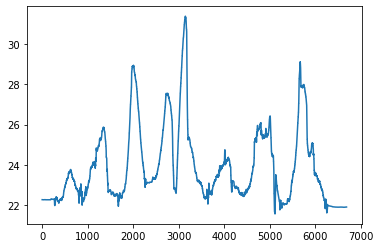

In [22]:
plt.plot(imu_rpy[:,-1]*180/np.pi)
# plt.ylim(-150,-100)

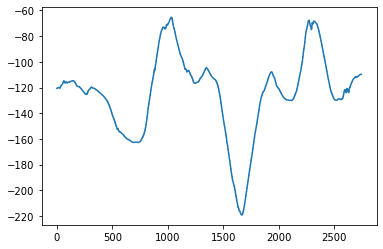

In [33]:
plt.plot(np.unwrap(imu_rpy[:,-1])*180/np.pi)
# plt.ylim(-150,-100)

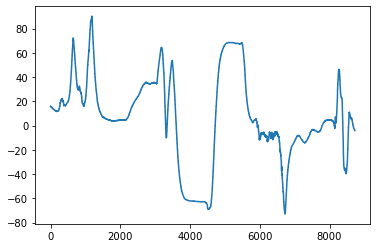

In [28]:
plt.plot(imu_rpy[:,-1]*180/np.pi)
# plt.ylim(-150,-100)